# Problem Statement:

<div class="alert alert-block alert-info"><b> 
 To predict the Customer life time value for an auto insurance company based on different quantitative and qualitative features provided.
</b></div> 

**Features**:
        Customer.Lifetime.Value-Customer lifetime value (CLV) is a measure of the total income a business can expect to     bring in from a typical customer for as long as that person or account remains a client. 
        
          'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'
    

<div class="alert alert-block alert-info"><b> 
  Models used:
    1-Linear,Ridge regression,
    2-decison trees,
    3.suppourt vector machines,
    4.random forest,
    5.boosted trees,
    6.knn regressor,
</b></div> 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
import seaborn as sns
from scipy import stats

import graphviz

from sklearn.metrics import r2_score
#models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8) #inbuilt figure size
sns.set_theme()#theme is grid
from sklearn.feature_selection import mutual_info_regression

Read the csv files of train,test,submission

In [2]:
train=pd.read_csv("train-1574429526318.csv",na_values="?")
test=pd.read_csv("test-1574429501088.csv",na_values="?")
sub=pd.read_csv("sample_submission-1577482703002.csv")

In [3]:
train.head() #check the top 5 rows

CustomerID  Customer.Lifetime.Value Coverage             Education  \
0        5917              7824.372789    Basic              Bachelor   
1        2057              8005.964669    Basic               College   
2        4119              8646.504109    Basic  High School or Below   
3        1801              9294.088719    Basic               College   
4        9618              5595.971365    Basic              Bachelor   

  EmploymentStatus Gender   Income Location.Geo Location.Code Marital.Status  \
0       Unemployed      F      0.0    17.7,77.7         Urban        Married   
1         Employed      M  63357.0    28.8,76.6      Suburban        Married   
2         Employed      F  64125.0    21.6,88.4         Urban        Married   
3         Employed      M  67544.0      19,72.5      Suburban        Married   
4          Retired      F  19651.0    19.1,74.7      Suburban        Married   

   ...  Months.Since.Policy.Inception  Number.of.Open.Complaints  \
0  ...                             33                        NaN   
1  ...                             42                        0.0   
2  ...                             44                        0.0   
3  ...                             15                        NaN   
4  ...                             68                        0.0   

   Number.of.Policies     Policy.Type        Policy Renew.Offer.Type  \
0                 2.0   Personal Auto   Personal L2           Offer2   
1                 5.0   Personal Auto   Personal L2           Offer2   
2                 3.0   Personal Auto   Personal L1           Offer2   
3                 3.0  Corporate Auto  Corporate L3           Offer1   
4                 5.0   Personal Auto   Personal L1           Offer2   

  Sales.Channel Total.Claim.Amount  Vehicle.Class  Vehicle.Size  
0        Branch         267.214383  Four-Door Car           2.0  
1         Agent         565.508572            SUV           2.0  
2        Branch         369.818708            SUV           1.0  
3        Branch         556.800000            SUV           3.0  
4           Web         345.600000   Two-Door Car           3.0  

[5 rows x 22 columns]

In [4]:
train.tail() #check the bottom 5 rows

CustomerID  Customer.Lifetime.Value  Coverage             Education  \
9801        3735             20496.694260     Basic  High School or Below   
9802        5988              2592.437797     Basic  High School or Below   
9803        8767              3103.923041  Extended               College   
9804        9900              9161.655119     Basic  High School or Below   
9805       11323              8583.272854   Premium  High School or Below   

     EmploymentStatus Gender   Income Location.Geo Location.Code  \
9801       Unemployed      F      0.0    12.7,79.4      Suburban   
9802         Employed      M  72421.0    18.6,72.3      Suburban   
9803         Employed      F  74665.0    19.2,74.7         Urban   
9804         Employed      F  91763.0    19.5,73.9         Urban   
9805         Disabled      F  18017.0    17.2,78.2      Suburban   

     Marital.Status  ...  Months.Since.Policy.Inception  \
9801         Single  ...                             72   
9802        Married  ...                             23   
9803        Married  ...                             90   
9804        Married  ...                             64   
9805       Divorced  ...                             54   

      Number.of.Open.Complaints  Number.of.Policies     Policy.Type  \
9801                        0.0                 2.0   Personal Auto   
9802                        0.0                 1.0  Corporate Auto   
9803                        2.0                 1.0  Corporate Auto   
9804                        0.0                 3.0    Special Auto   
9805                        0.0                 9.0   Personal Auto   

            Policy Renew.Offer.Type Sales.Channel Total.Claim.Amount  \
9801   Personal L2           Offer1        Branch         307.200000   
9802  Corporate L3           Offer2   Call Center         312.000000   
9803  Corporate L2           Offer2   Call Center         236.902001   
9804    Special L3           Offer1   Call Center         441.992043   
9805   Personal L3           Offer2   Call Center         547.200000   

      Vehicle.Class  Vehicle.Size  
9801  Four-Door Car           2.0  
9802  Four-Door Car           3.0  
9803  Four-Door Car           2.0  
9804            SUV           3.0  
9805  Four-Door Car           2.0  

[5 rows x 22 columns]

In [5]:
test

CustomerID  Coverage Education EmploymentStatus Gender   Income  \
0             17     Basic  Bachelor         Employed      M  43836.0   
1             19  Extended   College         Employed      F  28812.0   
2             29   Premium    Master         Employed      M  77026.0   
3             34     Basic  Bachelor         Employed      F  24599.0   
4             37  Extended  Bachelor         Disabled      F  13789.0   
...          ...       ...       ...              ...    ...      ...   
1762       11553     Basic  Bachelor         Employed      F  61896.0   
1763       11557     Basic    Doctor         Employed      F  39317.0   
1764       11559     Basic  Bachelor         Employed      F  30205.0   
1765       11570  Extended   College         Employed      M  36918.0   
1766       11572  Extended  Bachelor         Employed      F  59367.0   

     Location.Geo Location.Code Marital.Status  Monthly.Premium.Auto  ...  \
0       12.6,79.4         Rural         Single                  73.0  ...   
1       17.3,78.4         Urban        Married                  93.0  ...   
2       18.4,73.5         Urban        Married                 110.0  ...   
3       17.1,78.2         Rural        Married                  64.0  ...   
4         13,80.1      Suburban       Divorced                  79.0  ...   
...           ...           ...            ...                   ...  ...   
1762    19.4,72.8         Urban        Married                 104.0  ...   
1763    19.4,71.9         Rural         Single                  64.0  ...   
1764    19.2,74.3      Suburban         Single                 195.0  ...   
1765    18.9,72.7      Suburban       Divorced                  76.0  ...   
1766    18.8,73.2         Rural        Married                  84.0  ...   

      Months.Since.Policy.Inception  Number.of.Open.Complaints  \
0                                44                          0   
1                                 7                          0   
2                                82                          2   
3                                50                          1   
4                                49                          0   
...                             ...                        ...   
1762                             97                          0   
1763                             46                          0   
1764                              1                          0   
1765                             77                          3   
1766                             48                          0   

      Number.of.Policies     Policy.Type        Policy Renew.Offer.Type  \
0                      1   Personal Auto   Personal L1           Offer1   
1                      8    Special Auto    Special L2           Offer2   
2                      3  Corporate Auto  Corporate L1           Offer2   
3                      2  Corporate Auto  Corporate L2           Offer2   
4                      1   Personal Auto   Personal L3           Offer4   
...                  ...             ...           ...              ...   
1762                   1   Personal Auto   Personal L2           Offer4   
1763                   1   Personal Auto   Personal L2           Offer2   
1764                   4   Personal Auto   Personal L3           Offer1   
1765                   3   Personal Auto   Personal L1           Offer1   
1766                   1   Personal Auto   Personal L3           Offer2   

     Sales.Channel Total.Claim.Amount  Vehicle.Class Vehicle.Size  
0            Agent         138.130879  Four-Door Car      Medsize  
1           Branch         425.527834  Four-Door Car      Medsize  
2            Agent         472.029737  Four-Door Car      Medsize  
3           Branch          42.920271  Four-Door Car      Medsize  
4      Call Center         379.200000  Four-Door Car      Medsize  
...            ...                ...            ...          ...  
1762   Call Center         461.306

In [6]:
train.shape #shape of the train data

(9806, 22)

In [7]:
train.columns # names of columns in train data

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [8]:
train.describe()# describe gives the summary statstics of train data

CustomerID  Customer.Lifetime.Value        Income  \
count   9806.000000              9806.000000   9688.000000   
mean    5778.381807              7998.047015  37511.054604   
std     3343.286093              6848.055899  30292.974468   
min        1.000000              1898.007675      0.000000   
25%     2879.250000              4013.949039      0.000000   
50%     5783.000000              5780.182197  33767.500000   
75%     8678.750000              8960.280213  62018.000000   
max    11573.000000             83325.381190  99981.000000   

       Monthly.Premium.Auto  Months.Since.Last.Claim  \
count           9012.000000              9806.000000   
mean              93.340657                15.143993   
std               34.417763                10.004327   
min               61.000000                 0.000000   
25%               68.750000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000000   
max              297.000000                35.000000   

       Months.Since.Policy.Inception  Number.of.Open.Complaints  \
count                    9806.000000                8988.000000   
mean                       48.165001                   0.379172   
std                        27.963630                   0.896427   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.750000                   0.000000   
max                        99.000000                   5.000000   

       Number.of.Policies  Total.Claim.Amount  Vehicle.Size  
count         9685.000000         9806.000000   9680.000000  
mean             2.960351          438.266734      2.089773  
std              2.389801          293.502301      0.538524  
min              1.000000            0.099007      1.000000  
25%              1.000000          280.352767      2.000000  
50%              2.000000          384.007015      2.000000  
75%              4.000000          553.540973      2.000000  
max              9.000000         2893.239678      3.000000

In [9]:
train.info() #checking the data types, non null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9806 entries, 0 to 9805
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     9806 non-null   int64  
 1   Customer.Lifetime.Value        9806 non-null   float64
 2   Coverage                       8881 non-null   object 
 3   Education                      9677 non-null   object 
 4   EmploymentStatus               9688 non-null   object 
 5   Gender                         9677 non-null   object 
 6   Income                         9688 non-null   float64
 7   Location.Geo                   9806 non-null   object 
 8   Location.Code                  9687 non-null   object 
 9   Marital.Status                 9677 non-null   object 
 10  Monthly.Premium.Auto           9012 non-null   float64
 11  Months.Since.Last.Claim        9806 non-null   int64  
 12  Months.Since.Policy.Inception  9806 non-null   i

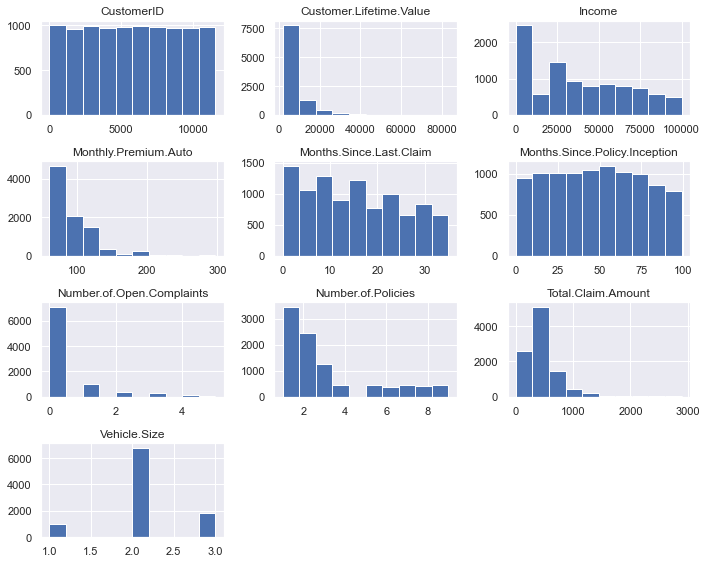

<Figure size 2160x2160 with 0 Axes>

In [5]:
_ =train.hist()
plt.tight_layout()
plt.figure(figsize=(30,30))
plt.show()

In [9]:
cat_col=['Coverage', 'Education', 'EmploymentStatus',
       'Location.Code', 'Marital.Status',
       'Vehicle.Size']

#seperaring category columns

In [8]:
num_col=['Income',
       'Monthly.Premium.Auto',
       'Number.of.Policies', 'Total.Claim.Amount']
#seperating numerical columns

In [26]:
#checking value counts present in each column
for i in train.columns:
    print(i)
    print(train[i].value_counts(normalize=True)*100)
    print(f"unique values of {i}-------->{len(train[i].unique())}")
    print("<------------------------------->")

CustomerID
5917     0.010198
2315     0.010198
8440     0.010198
7806     0.010198
11064    0.010198
           ...   
3034     0.010198
2637     0.010198
9334     0.010198
8102     0.010198
11323    0.010198
Name: CustomerID, Length: 9806, dtype: float64
unique values of CustomerID-------->9806
<------------------------------->
Customer.Lifetime.Value
6689.022728     0.132572
10656.881950    0.112176
10208.927610    0.101978
6521.368813     0.101978
7285.030983     0.101978
                  ...   
15083.784980    0.010198
9082.833891     0.010198
6245.443568     0.010198
8556.418397     0.010198
8583.272854     0.010198
Name: Customer.Lifetime.Value, Length: 6477, dtype: float64
unique values of Customer.Lifetime.Value-------->6477
<------------------------------->
Coverage
Basic       60.364824
Extended    30.368202
Premium      9.266974
Name: Coverage, dtype: float64
unique values of Coverage-------->4
<------------------------------->
Education
Bachelor                30.319314
Co

In [27]:
for i in train[num_col]:
    print(i)
    print("Skewness: %f" % train[i].skew())
    print("<--------------------------->")
#checking the skewness of numerical columns and Monthly.Premium.Auto,Number.of.Open.Complaints are right skewed

Income
Skewness: 0.287768
<--------------------------->
Monthly.Premium.Auto
Skewness: 2.106710
<--------------------------->
Number.of.Policies
Skewness: 1.260867
<--------------------------->
Total.Claim.Amount
Skewness: 1.731247
<--------------------------->


In [6]:
def transform(train):
    train['Monthly.Premium.Auto'] = np.log1p(train['Monthly.Premium.Auto'])
    train['Number.of.Open.Complaints'] = np.log1p(train['Number.of.Open.Complaints'])
transform(train)
#creating a function which transforms the rightskewed  into normal disturbution

In [30]:
hex=train['Monthly.Premium.Auto']

In [34]:
hex.skew()

2.106709722628019

In [43]:
hex1=stats.boxcox(train['Monthly.Premium.Auto'])[0]

In [47]:
train['Monthly.Premium.Auto'].skew()

nan

In [46]:
a,b = stats.boxcox(train['Monthly.Premium.Auto'])
train['Monthly.Premium.Auto']=a

In [10]:
for i in train[num_col]:
    print(i)
    print("Skewness: %f" % train[i].skew())
    print("<--------------------------->")
#everything is in rightpace

Income
Skewness: 0.287768
<--------------------------->
Monthly.Premium.Auto
Skewness: 1.011591
<--------------------------->
Number.of.Policies
Skewness: 1.260867
<--------------------------->
Total.Claim.Amount
Skewness: 1.731247
<--------------------------->


In [11]:
df_cat1 = train.select_dtypes(include = ['object'])

# Explotary Data Analysis

<div class="alert alert-block alert-info"><b> 
  Pie-charts
</b></div> 

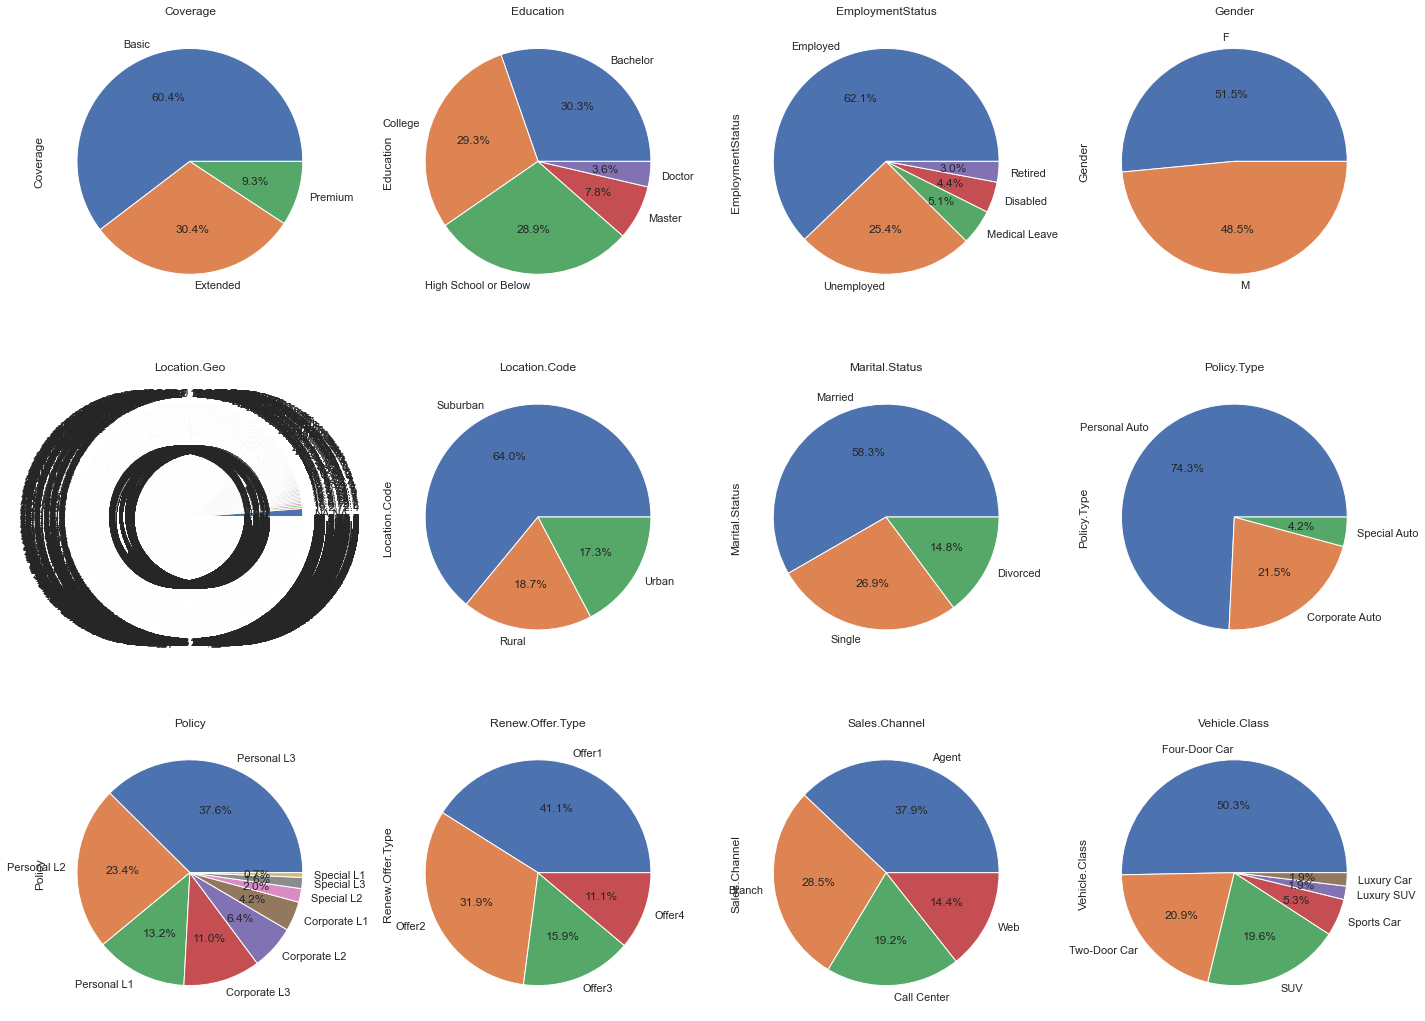

In [329]:
fig, axes = plt.subplots(round(len(df_cat1.columns) / 4), 4, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat1.columns):
        train[df_cat1.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_title(df_cat1.columns[i])

fig.tight_layout()


The pie charts show the percentage of customers in each category of the categorical variables

<div class="alert alert-block alert-info"><b> 
  Bar plots
</b></div> 

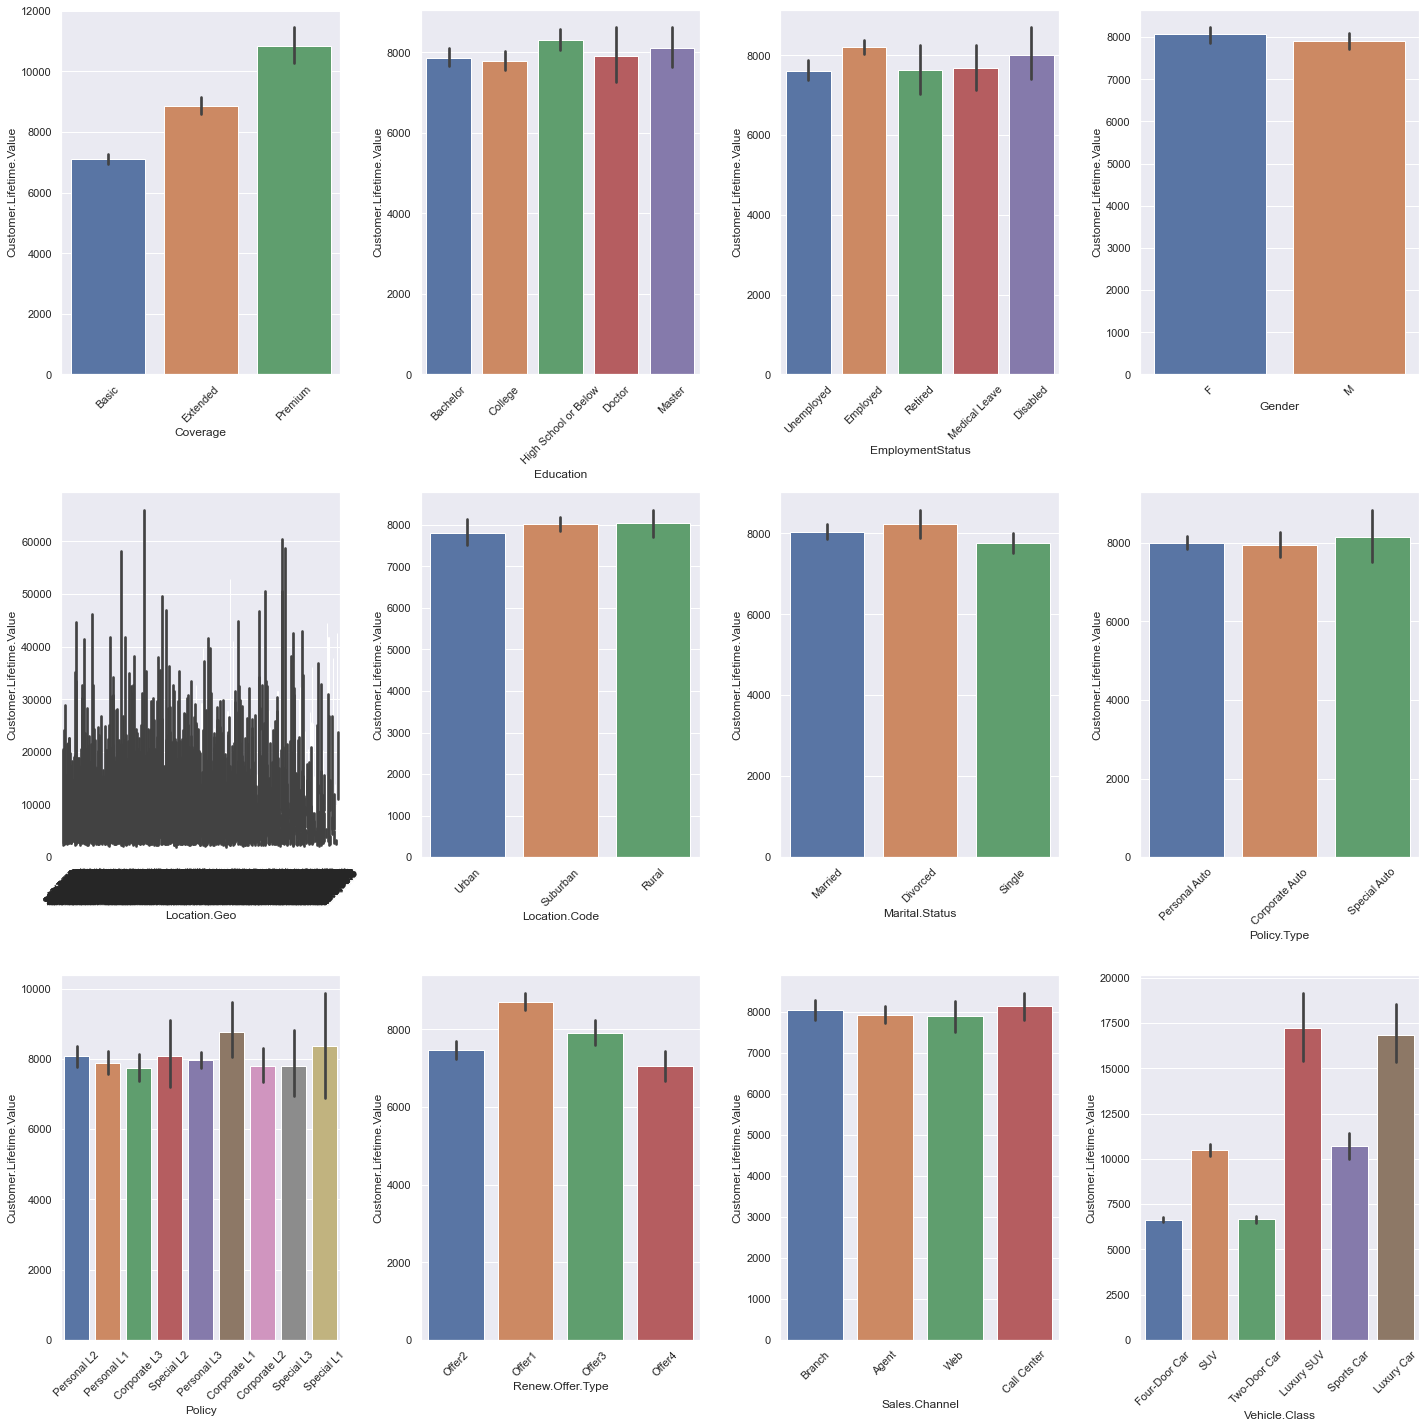

In [455]:
fig, axes = plt.subplots(round(len(df_cat1.columns) / 4), 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat1.columns):
        sns.barplot(x = train[df_cat1.columns[i]],y = train['Customer.Lifetime.Value'],data = train, ax = ax )
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()

The Bar charts show the average customer life time value of customers in each category of the categorical variables

<div class="alert alert-block alert-info"><b> 
  Histograms-KDE
</b></div> 

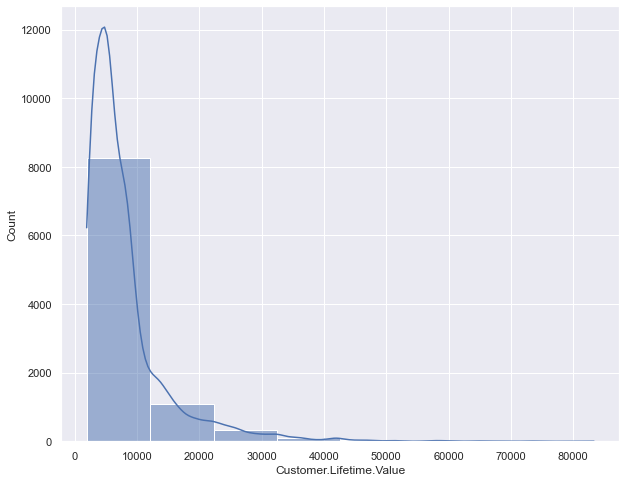

In [17]:
sns.histplot(train["Customer.Lifetime.Value"],kde=True,bins=8)
plt.show()


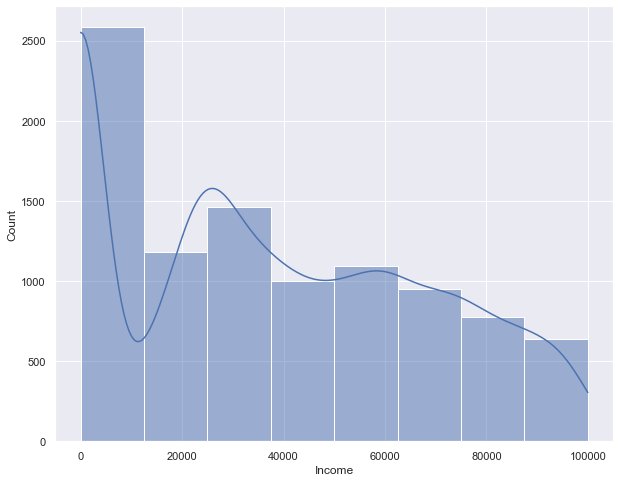

In [18]:
sns.histplot(train['Income'],kde=True,bins=8)
plt.show()


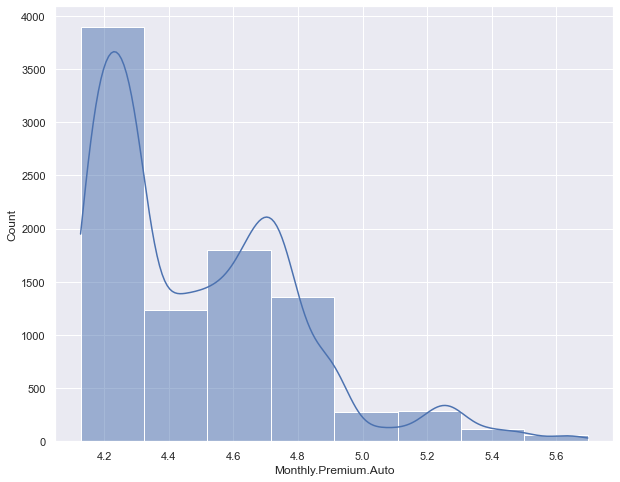

In [19]:
sns.histplot(train['Monthly.Premium.Auto'],kde=True,bins=8)
plt.show()

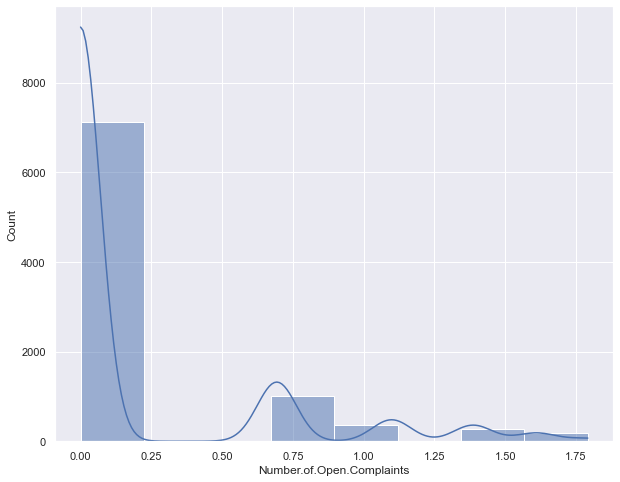

In [20]:
sns.histplot(train['Number.of.Open.Complaints'],kde=True,bins=8)
plt.show()

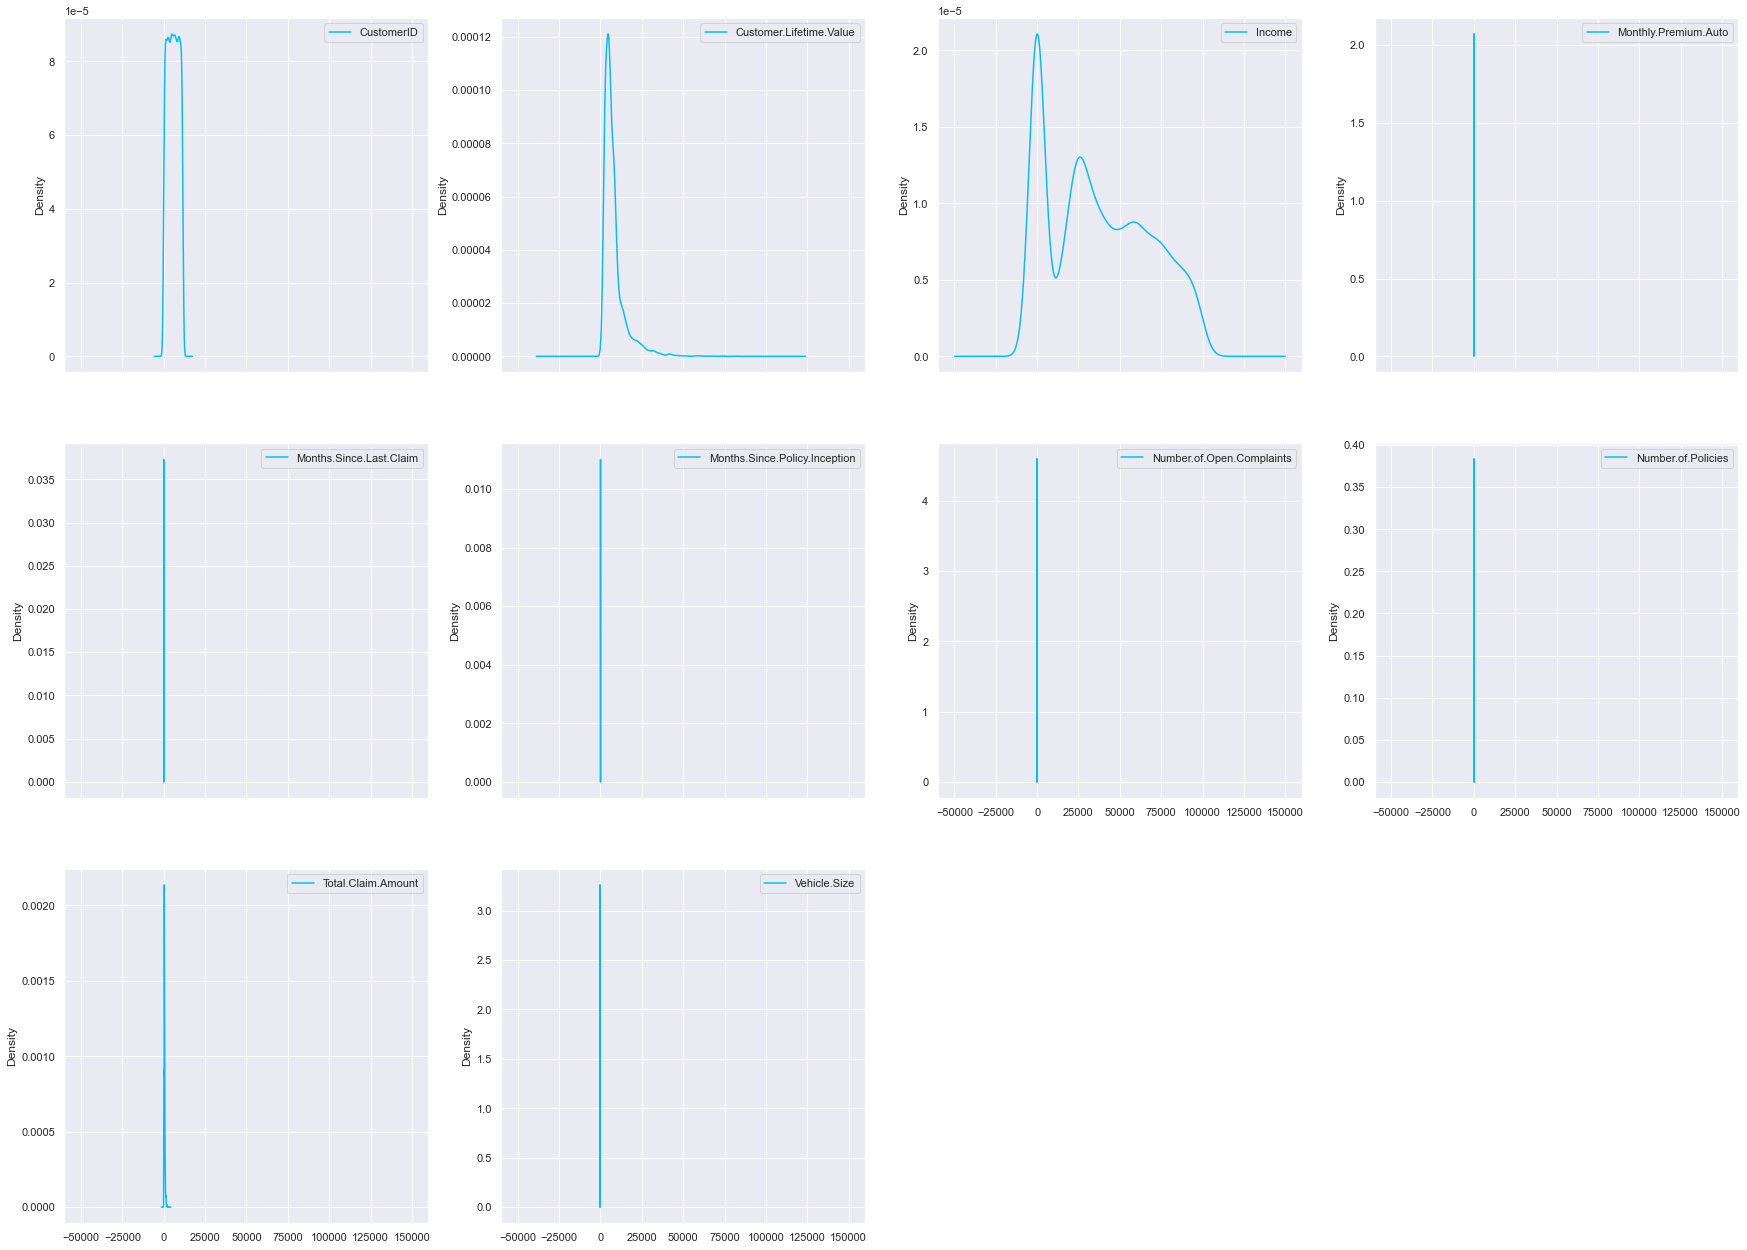

In [334]:
train.plot.kde(subplots = True, figsize = (30, 30),
                       layout = (4,4), color = "deepskyblue");

violin plots:
------------------------------


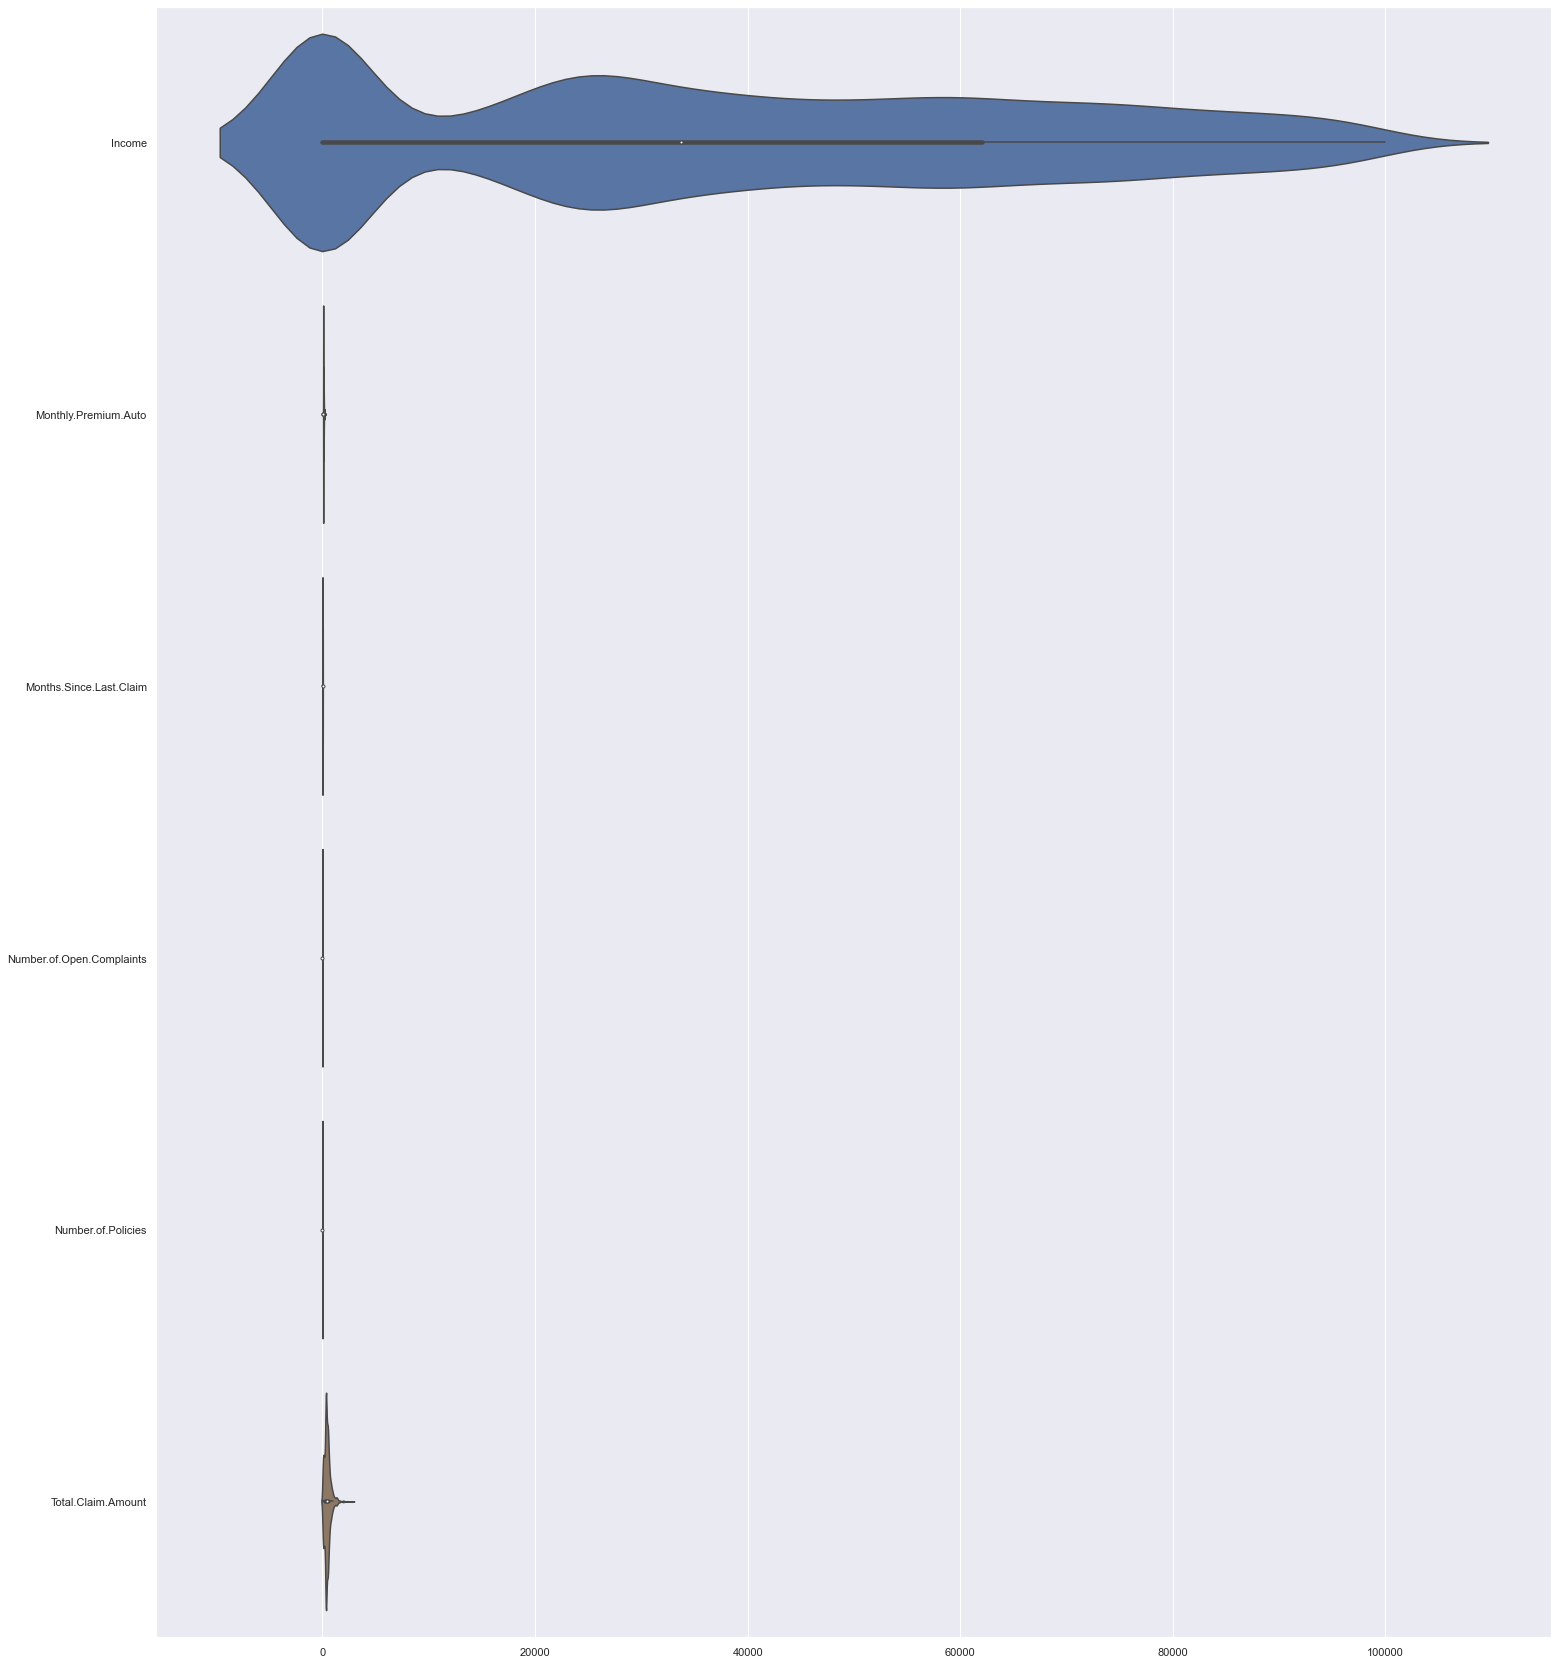

In [472]:
fig, axes = plt.subplots(figsize=(25,30))
sns.violinplot(data = train[num_col],
               orient = "h",
               scale = "width");

print("violin plots:")
print("------------------------------")

<div class="alert alert-block alert-info"><b> 
  Correlation between Independent features and Dependent Features
</b></div> 

In [12]:
df_num_corr = train.corr()['Customer.Lifetime.Value'].sort_values(ascending=False)
df_num_corr

Customer.Lifetime.Value          1.000000
Monthly.Premium.Auto             0.401145
Total.Claim.Amount               0.221572
Income                           0.022937
Number.of.Policies               0.022227
Vehicle.Size                     0.019749
Months.Since.Policy.Inception    0.011508
Months.Since.Last.Claim          0.007151
CustomerID                      -0.008037
Number.of.Open.Complaints       -0.036969
Name: Customer.Lifetime.Value, dtype: float64

<div class="alert alert-block alert-info"><b> 
 Heat map
</b></div> 

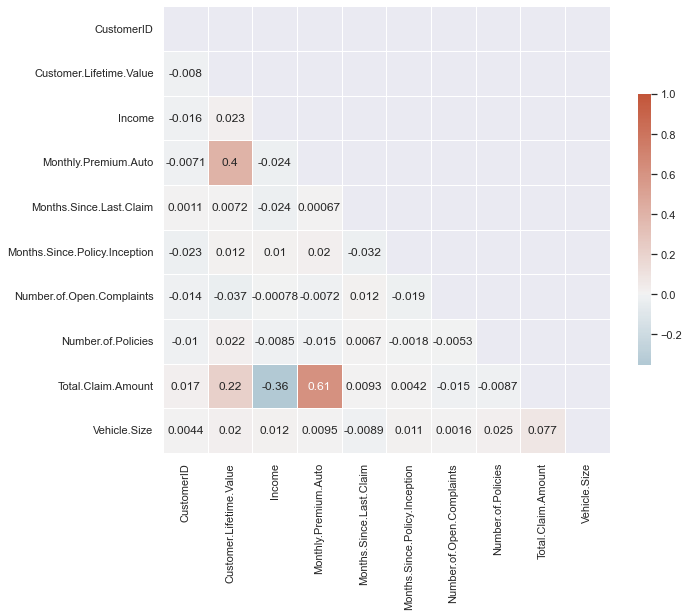

In [18]:
f, ax = plt.subplots(figsize=(10,10))
mat = train.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

1-None of the features are strongly correlated with the target variable (Customer Life time Value).

2.The highest correlation can be seen between two independent variables - Monthly premium auto and total claim amount, which is equal to 0.61.

# Feature Engineering

In [13]:
def unnecessary(train):
   return train.drop("CustomerID",axis=1,inplace=True)

#drop customer id which is unique and doesn't give information to train data

In [23]:
imp=["Coverage","Number.of.Policies","Monthly.Premium.Auto",
     "EmploymentStatus","Total.Claim.Amount","Income","Education","Marital.Status",
     "Location.Code","Vehicle.Size",
     "Customer.Lifetime.Value"]
main=train[imp]


<div class="alert alert-block alert-info"><b> 
  splitting the x and y
</b></div> 


In [14]:
x=train.drop("Customer.Lifetime.Value",axis=1)
y=train["Customer.Lifetime.Value"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# preprocessing

<div class="alert alert-block alert-info"><b> 
  Missing value imputation
</b></div> 


In [16]:
cat_imputer=SimpleImputer(strategy="most_frequent")
cat_imputer.fit(x_train[cat_col])

SimpleImputer(strategy='most_frequent')

In [17]:
cat_train=pd.DataFrame(cat_imputer.transform(x_train[cat_col]),columns=cat_col)
cat_test=pd.DataFrame(cat_imputer.transform(x_test[cat_col]),columns=cat_col)

In [18]:
num_imputer=SimpleImputer(strategy="median")
num_imputer.fit(x_train[num_col])

SimpleImputer(strategy='median')

In [19]:
nu_train=pd.DataFrame(num_imputer.transform(x_train[num_col]),columns=num_col)
nu_test=pd.DataFrame(num_imputer.transform(x_test[num_col]),columns=num_col)

<div class="alert alert-block alert-info"><b> 
  scaling the data using normalization
</b></div> 


In [36]:
st=StandardScaler()


In [20]:
st=StandardScaler()
st.fit(nu_train)

StandardScaler()

In [21]:
num_train=pd.DataFrame(st.transform(nu_train),columns=num_col)
num_test=pd.DataFrame(st.transform(nu_test),columns=num_col)

<div class="alert alert-block alert-info"><b> 
  Dummifing categorical features into numerical using Label encoder
</b></div> 


In [22]:
le = LabelEncoder()
def label(cat_train):
    for i in cat_train.columns:
       cat_train[i]=le.fit_transform(cat_train[i])

In [23]:
label(cat_train)

In [24]:
label(cat_test)

<div class="alert alert-block alert-info"><b> 
  concat the dummfiying values,scaling values
</b></div> 


In [25]:
x_tr=pd.concat([num_train,cat_train],axis=1)

In [26]:
x_te=pd.concat([num_test,cat_test],axis=1)

In [27]:
x_tr

Income  Monthly.Premium.Auto  Number.of.Policies  Total.Claim.Amount  \
0     0.579148              0.110587            1.693126            0.549012   
1    -1.243026             -0.369035            1.693126           -0.104022   
2    -0.417260             -1.081593           -0.826009           -0.961396   
3    -1.243026             -1.029199            1.693126            0.001416   
4    -1.243026              0.754862            1.273270            0.384783   
...        ...                   ...                 ...                 ...   
7839 -1.243026             -0.730601           -0.826009            0.269662   
7840 -1.243026             -0.683267           -0.826009           -0.331200   
7841  0.536038             -0.201601           -0.406153           -0.363926   
7842  0.966634             -0.201601           -0.826009           -1.091845   
7843 -0.646945             -0.683267           -0.406153           -0.046290   

      Coverage  Education  EmploymentStatus  Location.Code  Marital.Status  \
0            1          3                 1              1               1   
1            1          3                 4              1               2   
2            0          0                 1              0               1   
3            0          1                 4              1               2   
4            0          0                 4              1               1   
...        ...        ...               ...            ...             ...   
7839         0          3                 4              1               2   
7840         0          0                 4              1               1   
7841         0          1                 1              1               1   
7842         1          0                 1              0               2   
7843         0          3                 3              1               1   

      Vehicle.Size  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
7839             1  
7840             1  
7841             1  
7842             2  
7843             1  

[7844 rows x 10 columns]

# Model Building

<div class="alert alert-block alert-info"><b> 
  creating a functions of meansquared error,r2 score
</b></div> 

In [29]:
def score(y_train,ypred,y_test,y_pred):
    print(f" training score:{np.sqrt(mean_squared_error(y_train,ypred))}")
    print(f" test score:{np.sqrt(mean_squared_error(y_test,y_pred))}")
    

In [30]:
def r2(y_train,ypred,y_test,y_pred):
    print(f" training score:{r2_score(y_train,ypred)}")
    print(f" test score:{r2_score(y_test,y_pred)}")

<div class="alert alert-block alert-info"><b> 
  Ridge Regression
</b></div> 

In [31]:
from sklearn.linear_model import Ridge

In [32]:
lr=Ridge()
lr.fit(x_tr,y_train)
ypred=lr.predict(x_tr)
y_pred=lr.predict(x_te)

In [33]:
score(y_train,ypred,y_test,y_pred)

 training score:6370.756968511389
 test score:5985.660351803327


In [34]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.1535763365873284
 test score:0.15899552153788465


<div class="alert alert-block alert-info"><b> 
  KNeighborsRegressor
</b></div> 

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
kn=KNeighborsRegressor(n_neighbors=10)
kn.fit(x_tr,y_train)
ypred=kn.predict(x_tr)
y_pred=kn.predict(x_te)

In [37]:
score(y_train,ypred,y_test,y_pred)

 training score:5486.820328296761
 test score:5677.944958153005


In [38]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.37216257737449876
 test score:0.24324286329800782


<div class="alert alert-block alert-info"><b> 
  DecisionTreeRegressor
</b></div> 

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
param_grid = {'max_depth' : range(1,5), 
              'min_impurity_decrease' : [0.0001, 0.01]}

In [41]:
dt=DecisionTreeRegressor()
gdt = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 3)
%time gdt.fit(x_tr,y_train)
ypred=gdt.predict(x_tr)
y_pred=gdt.predict(x_te)

Wall time: 203 ms


In [42]:
score(y_train,ypred,y_test,y_pred)

 training score:4175.62431959113
 test score:3899.6921673845222


In [43]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.6363793346222734
 test score:0.6430274502040143


<div class="alert alert-block alert-info"><b> 
   XGBRegressor
</b></div> 

In [44]:
from xgboost import XGBRegressor

In [45]:
XGB = XGBRegressor(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.6, 0.8, 2),
     'n_estimators':[100,200],
     'max_depth': [5, 10]
}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

In [46]:
%time CV_XGB.fit(x_tr,y_train)
ypred=CV_XGB.predict(x_tr)
y_pred=CV_XGB.predict(x_te)

Wall time: 35 s


In [47]:
score(y_train,ypred,y_test,y_pred)

 training score:2749.5766584365633
 test score:3757.621069501073


In [48]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.8423342412195357
 test score:0.6685636530005729


<div class="alert alert-block alert-info"><b> 
  support vector machine
</b></div> 

In [49]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_tr,y_train)
ypred=sv.predict(x_tr)
y_pred=sv.predict(x_te)

In [64]:
score(y_train,ypred,y_test,y_pred)

 training score:7232.707126363936
 test score:6772.096263507806


In [65]:
r2(y_train,ypred,y_test,y_pred)

 training score:-0.09095661430754975
 test score:-0.07651581576401156



<div class="alert alert-block alert-info"><b> 
  RandomForestRegressor
</b></div> 

In [436]:
param_grid = {"n_estimators" : [50,100,1000],
              "min_samples_split": [2, 5,7],
              "max_depth": [3,4,5, 7],
              "min_samples_leaf": [1, 5],
              "ccp_alpha":[0.0001,0.001,0.01,0.1]
             }

In [437]:
rc=RandomForestRegressor()

In [438]:
rfclf_grid = GridSearchCV(rc, param_grid, cv=3,verbose=1)

In [439]:
rfclf_grid.fit(x_tr,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [3, 4, 5, 7], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [50, 100, 1000]},
             verbose=1)

In [440]:
ypred=rfclf_grid.predict(x_tr)
y_pred=rfclf_grid.predict(x_te)

In [441]:
score(y_train,ypred,y_test,y_pred)

 training score:3705.420196547557
 test score:3749.4924050550876


In [442]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.7136609042289204
 test score:0.6699960597067964


<div class="alert alert-block alert-info"><b> 
  GradientBoostingRegressor
</b></div> 

In [66]:
gb = GradientBoostingRegressor(n_estimators=1000)

<IPython.core.display.Javascript object>

In [67]:
gb.fit(x_tr,y_train)
ypred=gb.predict(x_tr)
y_pred=gb.predict(x_te)

In [68]:
score(y_train,ypred,y_test,y_pred)

 training score:2687.181736026427
 test score:3961.7100187461215


In [69]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.8494087290396982
 test score:0.6315831062990152


<div class="alert alert-block alert-info"><b> 
  LightGradientBoostingRegressor
</b></div>

In [119]:
param={'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': [0.2,0.3,0.4], 
             'colsample_bytree': [0.4,0.3,0.2],
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7],
             'reg_lambda': [0, 1e-1, 1, 5, 10]}

In [121]:
clf = lgb.LGBMRegressor(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=1000)

<IPython.core.display.Javascript object>

In [126]:
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param,
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

<IPython.core.display.Javascript object>

In [127]:
%time gs.fit(x_tr,y_train)
ypred=gs.predict(x_tr)
y_pred=gs.predict(x_te)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Wall time: 19.3 s


In [128]:
score(y_train,ypred,y_test,y_pred)

 training score:2445.044718610195
 test score:3846.254057056826


In [129]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.875325012419106
 test score:0.6527437238773218


# Conclusion

<div class="alert alert-block alert-info"><b> 
   Tuned Random forest regressor gave the best results as compared to all the other algorithms we tried.
</b></div> 

# Lets work on test data

In [443]:
unnecessary(test)

In [444]:
transform(test)

In [445]:
cat_imputer=SimpleImputer(strategy="most_frequent")
cat_imputer.fit(test[cat_col])

SimpleImputer(strategy='most_frequent')

In [446]:
cat_train=pd.DataFrame(cat_imputer.transform(test[cat_col]),columns=cat_col)

In [447]:
num_imputer=SimpleImputer(strategy="median")
num_imputer.fit(test[num_col])

SimpleImputer(strategy='median')

In [448]:
num_train=pd.DataFrame(num_imputer.transform(test[num_col]),columns=num_col)

In [449]:
label(cat_train)

In [450]:
te=pd.concat([num_train,cat_train],axis=1)

In [451]:
pred=rfclf_grid.predict(te)

In [462]:
pred1=gdt.predict(te)

In [452]:
sub["Customer.Lifetime.Value"]=pred

In [463]:
sub["Customer.Lifetime.Value"]=pred1

In [464]:
sub.to_csv("decisontree.csv",index=False)

In [ ]:
sub["Customer.Lifetime.Value"]=pred

In [454]:
sub

CustomerID  Customer.Lifetime.Value
0             17              2883.140377
1             19              6966.932656
2             29              8749.406163
3             34              9800.494267
4             37              3036.945663
...          ...                      ...
1762       11553              4132.236595
1763       11557              2527.252470
1764       11559             15248.070682
1765       11570              6127.267673
1766       11572              3295.843037

[1767 rows x 2 columns]

In [380]:
train.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

# clustering:

In [5]:
from sklearn.cluster import KMeans

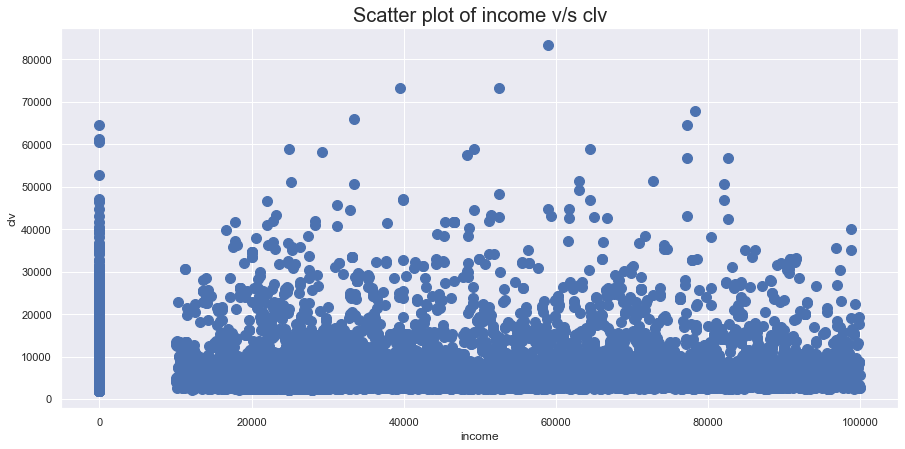

In [6]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of income v/s clv', fontsize = 20)
plt.xlabel('income')
plt.ylabel('clv')
plt.scatter( x = 'Income', y = 'Customer.Lifetime.Value', data = train, s = 100)
plt.show()

In [7]:
k=["Income","Customer.Lifetime.Value"]

In [8]:
train_copy=train.copy()

In [9]:
train_copy[k]

Income  Customer.Lifetime.Value
0         0.0              7824.372789
1     63357.0              8005.964669
2     64125.0              8646.504109
3     67544.0              9294.088719
4     19651.0              5595.971365
...       ...                      ...
9801      0.0             20496.694260
9802  72421.0              2592.437797
9803  74665.0              3103.923041
9804  91763.0              9161.655119
9805  18017.0              8583.272854

[9806 rows x 2 columns]

In [10]:
train_copy["Income"]=train_copy["Income"].fillna(np.mean(train_copy["Income"]))

In [11]:
X= train_copy[['Income','Customer.Lifetime.Value']].iloc[: , :].values

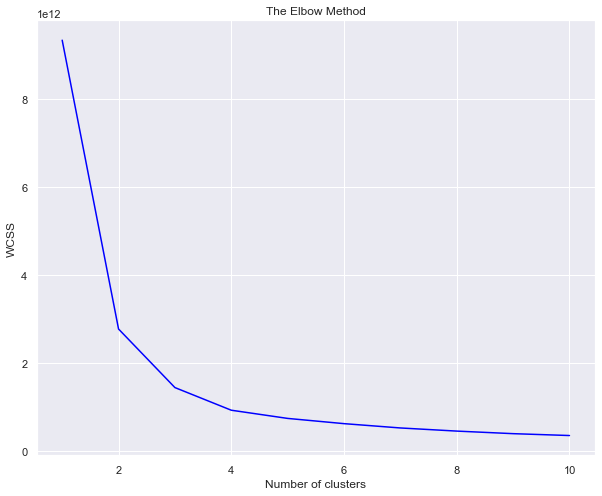

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, c = 'blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 4, 4, ..., 4, 2, 1])

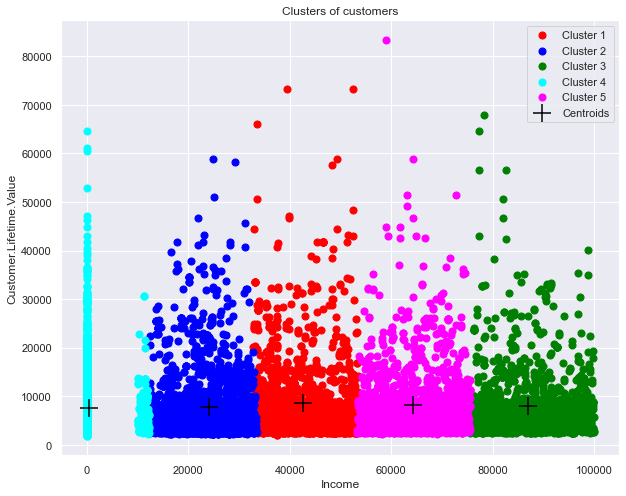

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, marker = '+', c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Customer.Lifetime.Value')
plt.legend()
plt.show()

<div class="alert alert-block alert-info"><b> 
 **Conclusion:**

-For large number of data K-Means Clustering is always good.
    
-It's easy to find the optimal no of clusters in K-Means because of elbow method. 
    
 (we can't find the optimal no of clusters accuratley by using dendogram for large number of data. hence, for large number of data Hierarchical clustering is not possible)
     </b></div>